![Image in a markdown cell](https://cursos.utnba.centrodeelearning.com/pluginfile.php/1/theme_space/customlogo/1738330016/Logo%20UTN%20Horizontal.png)



# **Diplomado de Ciencia de Datos y Análisis Avanzado**
# **Unidad 5: Modelado Predictivo I**: Regresión y Clasificación

---

# **Proyecto de Competencia Kaggle: Predicción de Abandono de Clientes**

## **Curso:** Diplomado en Ciencia de Datos

# **Nombres de los Miembros del Equipo: Grupo M **
### *   Lucia Cortes
### *   Maria Fernanda Farias
### *   Alejandro Gomez Grosschadl
### *   Favio Ruggieri
### *   Sergio Salanitri
### *   Karina Calvo

# **Objetivo:**
## El objetivo de este proyecto es construir y evaluar varios modelos de clasificación para predecir si un cliente de una compañía de telecomunicaciones abandonará o no el servicio (churn). El rendimiento final del mejor modelo se medirá en la competencia de Kaggle a través de la **métrica ROC AUC**.


---

# **Enlace para unirse a la competencia**
### **USE EL ENLACE PARA UNIRSE POR EQUIPO, NO DE MANERA INDIVIDUAL**

https://www.kaggle.com/t/57b70c381e4d451b8ae38e164b91a2aa


### **Por favor siga las indicaciones que se suministran en la plataforma**


# 0. **Configuración Inicial e Importación de Librerías**

## En esta sección, importaremos todas las librerías necesarias para el proyecto. Es una buena práctica tener todas las importaciones en la primera celda.


In [2]:
# Para manipulación de datos
import pandas as pd
import numpy as np

# Para visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns

# Para preprocesamiento
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Para modelado
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Para evaluación
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, f1_score

# Configuraciones adicionales para una mejor visualización
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
# Ignorar warnings para una salida más limpia (opcional)
import warnings
warnings.filterwarnings('ignore')

#  **1. Carga de Datos**

## Cargaremos los datasets proporcionados para la competencia: `train.csv`, `test.csv` y `sample_submission.csv`.


In [3]:
try:
    train_df = pd.read_csv("/content/train.csv")
    test_df = pd.read_csv("/content/test .csv")
    sample_submission_df = pd.read_csv('//content/sample_submission.csv')
except FileNotFoundError:
    print("Asegúrate de que los archivos .csv de la competencia estén en el mismo directorio que este cuaderno.")
    # Si usas Colab, puedes subir los archivos al entorno de ejecución.
    exit()

print("Forma del dataset de entrenamiento:", train_df.shape)
print("Forma del dataset de prueba:", test_df.shape)

print("\nPrimeras 5 filas del dataset de entrenamiento:")
display(train_df.head())

print("\nPrimeras 5 filas del dataset de prueba:")
display(test_df.head())

Asegúrate de que los archivos .csv de la competencia estén en el mismo directorio que este cuaderno.


NameError: name 'train_df' is not defined

# 2**. Análisis Exploratorio de Datos (EDA)**

## En esta fase, exploraremos el dataset de entrenamiento para entender mejor nuestros datos, encontrar patrones, identificar valores faltantes y visualizar relaciones entre las características y la variable objetivo (`Churn`).


In [ ]:
#Instalar librerias necesarias
!pip install ydata_profiling


In [ ]:
# 2. Info del dataset
train_df.info()
test_df.info()


In [ ]:
# 3. Generar el informe EDA train.csv
from ydata_profiling import ProfileReport
profile = ProfileReport(train_df, title="Reporte EDA de Predicción de abandono de Clientes", explorative=True)
profile.to_notebook_iframe()  # Ver reporte en Jupyter Notebook
profile.to_file("eda_report.html")  # Para exportar a HTML

### En el análisis exploratorio de datos automatico utilizando Pandas Profiling no se encontraron valores faltantes ni duplicados en el csv train

In [1]:
# 4. Generar el informe EDA test.csv
from ydata_profiling import ProfileReport
profile = ProfileReport(test_df, title="Reporte EDA de Predicción de abandono de Clientes", explorative=True)
profile.to_notebook_iframe()  # Ver reporte en Jupyter Notebook
profile.to_file("eda_report_test.html")  # Para exportar a HTML

NameError: name 'test_df' is not defined

En el análisis exploratorio de datos automatico utilizando Pandas Profiling no se encontraron valores faltantes ni duplicados en el csv test


# **3. Preprocesamiento de Datos**

## Prepararemos los datos para que puedan ser utilizados por los modelos de Machine Learning.

Maneja la columna 'TotalCharges' convirtiéndola a un tipo numérico, forzando errores a NaN, y luego llenando los valores faltantes. Además, codifica la columna categórica 'Churn' en representación numérica. Convierte 'TotalCharges' a numérico, llena los NaNs con 0, y codifica 'Churn'.

In [ ]:
# Preprocesamiento de Datos
train_df['TotalCharges'] = pd.to_numeric(train_df['TotalCharges'], errors='coerce')
train_df['TotalCharges'].fillna(0, inplace=True)
train_df['Churn'] = train_df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)
display(train_df.head())

#### Manejo características categóricas
Convertir otras columnas categóricas en un formato numérico adecuado para el cálculo de correlación
Para preparar los datos para el análisis de correlación, primero eliminaremos la columna 'customerID' que no aporta información. Luego, convertiremos todas las columnas categóricas restantes en un formato numérico utilizando one-hot encoding con pd.get_dummies(), estableciendo drop_first=True para evitar la multicolinealidad. Finalmente, mostraremos las primeras filas del DataFrame resultante para verificar los cambios.

In [10]:
train_df_encoded = train_df.drop('customerID', axis=1)
train_df_encoded = pd.get_dummies(train_df_encoded, drop_first=True)
display(train_df_encoded.head())

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,35,49.20,1701.65,0,True,False,False,False,True,...,False,True,False,True,False,False,False,False,True,False
1,0,15,75.10,1151.55,0,True,True,True,True,False,...,False,False,False,False,False,False,False,False,False,True
2,0,13,40.55,590.35,0,True,True,True,False,True,...,False,False,False,False,False,True,False,False,False,True
3,0,26,73.50,1905.70,0,False,True,False,True,False,...,False,True,False,True,False,True,True,True,False,False
4,0,1,44.55,44.55,0,True,True,True,True,False,...,False,False,False,False,False,False,False,False,True,False


Calcula la matriz de correlación del DataFrame procesado y extrae específicamente la correlación de todas las columnas con la columna 'Churn'.
Luego calcula la matriz de correlación y extrae las correlaciones con la columna 'Churn'ordenadas de menor a mayor

In [11]:
correlation_matrix = train_df_encoded.corr()
churn_correlation = correlation_matrix['Churn'].sort_values(ascending=False)
display(churn_correlation)

,Churn
Churn,1.000000
InternetService_Fiber optic,0.312656
PaymentMethod_Electronic check,0.309214
MonthlyCharges,0.198040
PaperlessBilling_Yes,0.197981
SeniorCitizen,0.145599
StreamingTV_Yes,0.072397
StreamingMovies_Yes,0.063786
MultipleLines_Yes,0.043766
PhoneService_Yes,0.017928


Visualización de la correlación
Visualización utilizando un mapa de calor

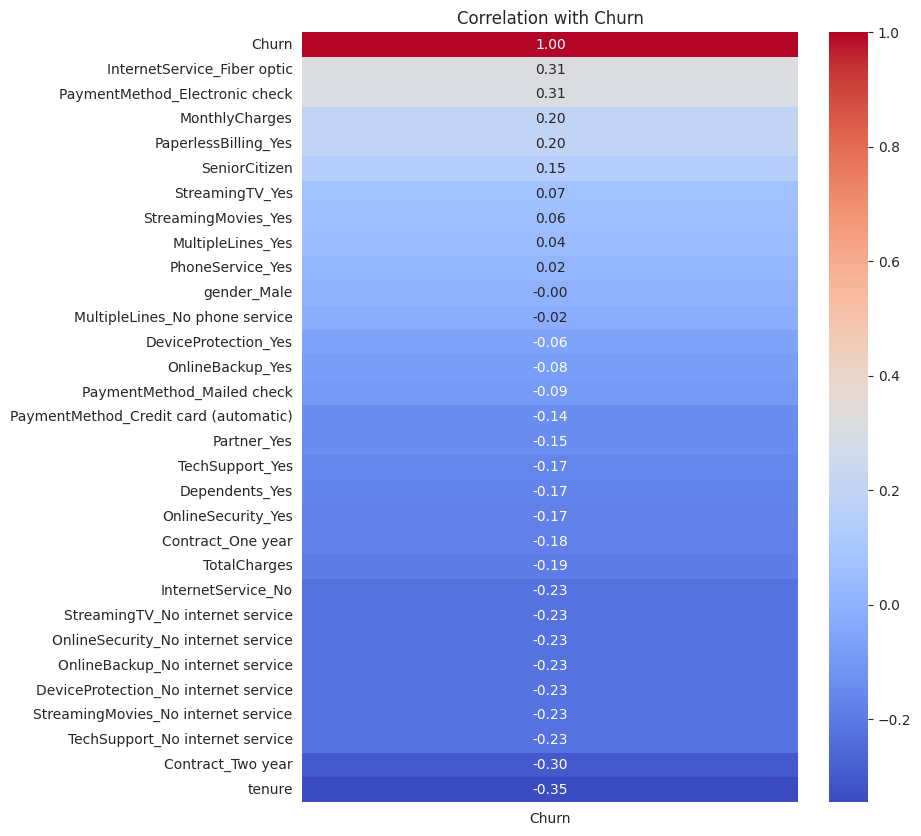

In [12]:
plt.figure(figsize=(8, 10))
sns.heatmap(churn_correlation.to_frame(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation with Churn')
plt.show()

# **4. Modelado y Evaluación**

## Ahora entrenaremos y evaluaremos los tres modelos requeridos:
## Regresión Logística, k-NN y Naive Bayes.


# Modelo de regresión Logistica
Implementar modelo de regresión logística con scikit-learn, para predicción de abandono del servicio (churn) utilizando sólo las variables con mayor correlación con churn (mayor a 0,2 o menor a -0,2).
### Selección de características
1) Basado en el análisis de correlación, se selecciona las características con un valor de correlación absoluto mayor que 0.3 con la columna 'Churn' como las variables independientes (X).
2) Se establece la columna 'Churn' como la variable dependiente (y).
3) Se selecciona las características especificadas del dataframe df_encoded para crear la matriz de características X y el vector objetivo y.
4) Se muestra las primeras filas de X y y para verificar la selección.

In [13]:
selected_features = [
    'InternetService_Fiber optic', 'PaymentMethod_Electronic check',
    'InternetService_No', 'StreamingTV_No internet service',
    'OnlineSecurity_No internet service', 'OnlineBackup_No internet service',
    'DeviceProtection_No internet service', 'StreamingMovies_No internet service',
    'TechSupport_No internet service', 'Contract_Two year', 'tenure'
]

X = train_df_encoded[selected_features]
y = train_df_encoded['Churn']

print("Feature matrix (X) head:")
display(X.head())
print("\nTarget vector (y) head:")
display(y.head())

Feature matrix (X) head:


,InternetService_Fiber optic,PaymentMethod_Electronic check,InternetService_No,StreamingTV_No internet service,OnlineSecurity_No internet service,OnlineBackup_No internet service,DeviceProtection_No internet service,StreamingMovies_No internet service,TechSupport_No internet service,Contract_Two year,tenure
0,False,True,False,False,False,False,False,False,False,False,35
1,True,False,False,False,False,False,False,False,False,False,15
2,False,False,False,False,False,False,False,False,False,True,13
3,False,False,False,False,False,False,False,False,False,True,26
4,False,True,False,False,False,False,False,False,False,False,1



Target vector (y) head:


,Churn
0,0
1,0
2,0
3,0
4,0


División del conjunto de datos en conjuntos de entrenamiento y prueba utilizando una proporción de 70/30 al azar, del dataset train.

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (3943, 11)
Shape of X_test: (1691, 11)
Shape of y_train: (3943,)
Shape of y_test: (1691,)


Inicialización del Modelo de Regresión Logistica y entrenamiento utilizando los datos.

In [27]:
model = LogisticRegression()
model.fit(X_train, y_train)
print("Logistic Regression model trained successfully.")

Logistic Regression model trained successfully.


Predicciones en el conjunto de prueba y evaluar el modelo.

Predictions made on the test set.

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1266
           1       0.67      0.46      0.55       425

    accuracy                           0.81      1691
   macro avg       0.75      0.69      0.71      1691
weighted avg       0.79      0.81      0.80      1691


Confusion Matrix:
[[1169   97]
 [ 228  197]]

ROC AUC Score: 0.8355162159650591


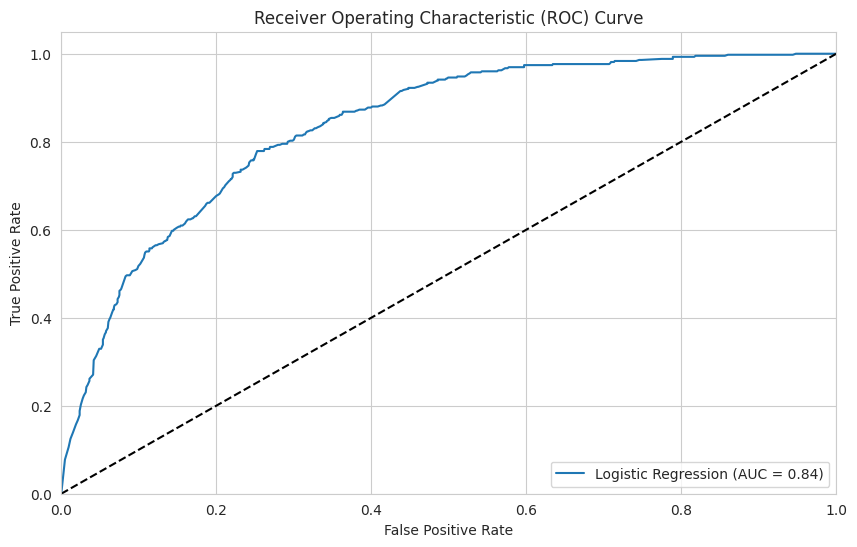

In [28]:
y_pred = model.predict(X_test)
print("Predictions made on the test set.")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print("\nROC AUC Score:", roc_auc)

fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.figure()
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

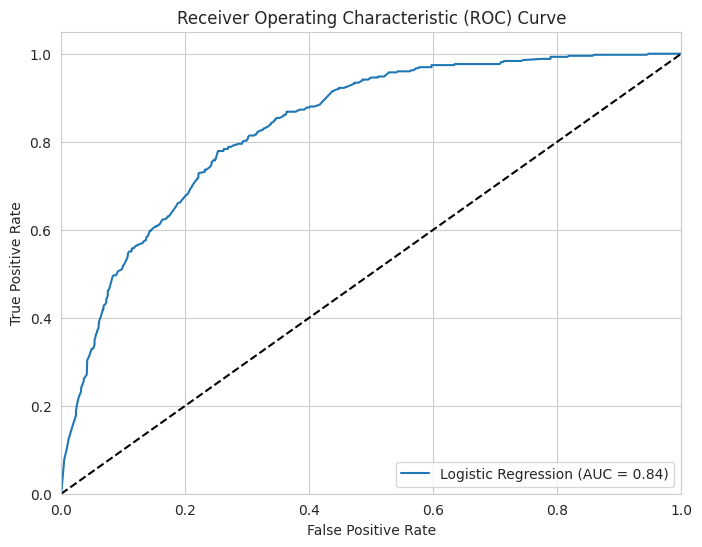

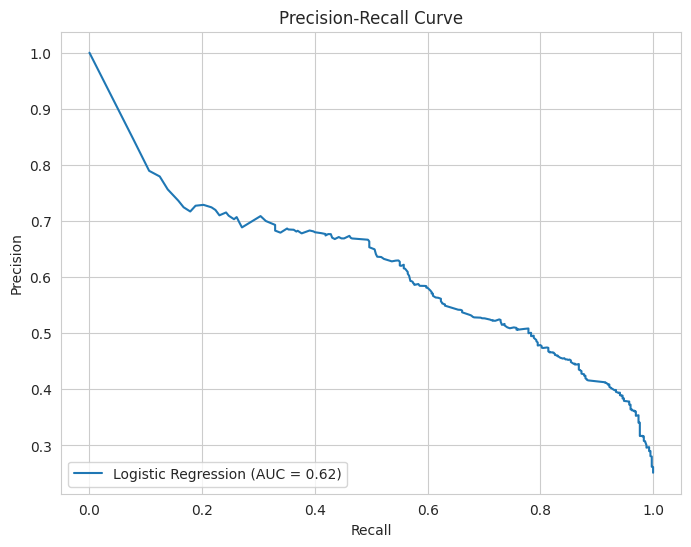

In [29]:
from sklearn.metrics import precision_recall_curve, auc

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Plot Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])
pr_auc = auc(recall, precision)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Logistic Regression (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

El Modelo de Regresion logística muestra un área bajo la curva de 0,836, una exactitud del 81%, una predicción de abandono de 0,67 (el modelo predijo que abandonaria el servicio el 67% de las veces) y recall de 0,46 (o sea el modelo sólo identificó el 46% de las veces que el abandono fue real.

# Modelo Gaussian Naive Bayes
Inicialización de un modelo de Gaussian Naive Bayes y entrenamiento utilizando los datos de entrenamiento (X_train y y_train).
Aca debido a la baja correlacion entre las variables, se asume que todas las características son independientes entres sí.

In [31]:
from sklearn.naive_bayes import GaussianNB

gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)

print("Gaussian Naive Bayes model trained successfully.")

Gaussian Naive Bayes model trained successfully.


Luego que el modelo de Naive Bayes Gaussiano ha sido entrenado, se realizan predicciones sobre el conjunto de prueba y se evalua su rendimiento.

Gaussian Naive Bayes Model Performance:
Accuracy: 0.5724423418095801
Precision: 0.36178107606679033
Recall: 0.9176470588235294
F1-score: 0.5189620758483033

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.46      0.62      1266
           1       0.36      0.92      0.52       425

    accuracy                           0.57      1691
   macro avg       0.65      0.69      0.57      1691
weighted avg       0.80      0.57      0.59      1691


Confusion Matrix:
[[578 688]
 [ 35 390]]

ROC AUC Score: 0.8144698448099619


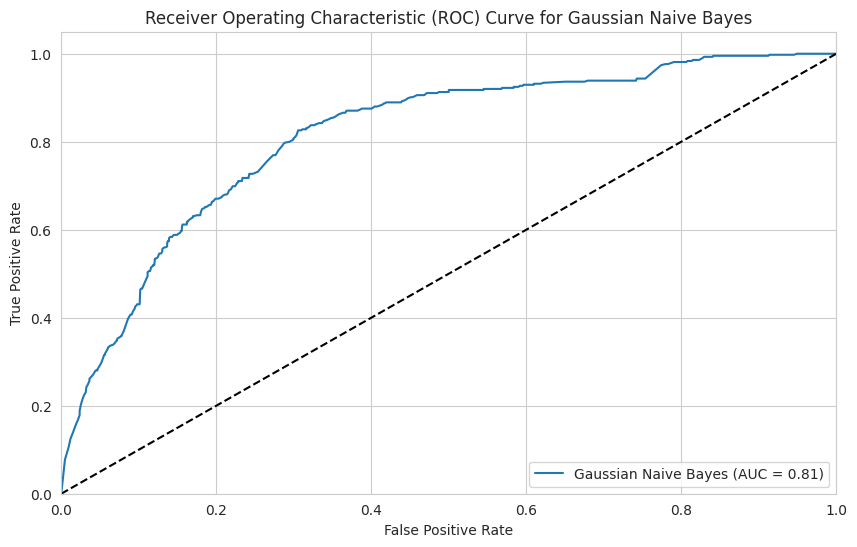

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred_gnb = gnb_model.predict(X_test)

print("Gaussian Naive Bayes Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_gnb))
print("Precision:", precision_score(y_test, y_pred_gnb))
print("Recall:", recall_score(y_test, y_pred_gnb))
print("F1-score:", f1_score(y_test, y_pred_gnb))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_gnb))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_gnb))

roc_auc_gnb = roc_auc_score(y_test, gnb_model.predict_proba(X_test)[:, 1])
print("\nROC AUC Score:", roc_auc_gnb)

fpr_gnb, tpr_gnb, thresholds_gnb = roc_curve(y_test, gnb_model.predict_proba(X_test)[:, 1])
plt.figure()
plt.plot(fpr_gnb, tpr_gnb, label=f'Gaussian Naive Bayes (AUC = {roc_auc_gnb:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Gaussian Naive Bayes')
plt.legend(loc="lower right")
plt.show()

El Modelo de Gaussian Naive Bayes muestra un área bajo la curva de 0,822, una exactitud del 75%, una predicción de abandono de 0,50 (el modelo sólo predijo que abandonaria el servicio el 50% de las veces) y recall de 0,72 (o sea el modelo identificó el 72% de las veces que el abandono fue real.

In [36]:
# Hacer Predicciones
y_pred_proba_gnb = gnb_model.predict_proba(X_test)[:, 1]
print("Predicted probabilities for churned class (y_pred_proba_gnb) generated.")

Predicted probabilities for churned class (y_pred_proba_gnb) generated.


#  **5. Selección de Modelo y Generación de Sumisión para Kaggle**

## Basado en tus resultados de validación, elige el mejor modelo . Luego, re-entrénalo usando **todos los datos de `train.csv`** y úsalo para hacer predicciones sobre `test.csv`.


## Comparación de rendimiento del modelo de Naive Bayes Gaussiano con el modelo de Regresión Logística

Para comparar el rendimiento de los dos modelos:
1) Creacion de DataFrame de pandas que resuma las métricas de evaluación clave para ambos modelos, Regresión Logística y Naive Bayes Gaussiano.
2) Presentación del DataFrame y  un resumen de comparación, destacando qué modelo tuvo un mejor rendimiento según las métricas.

In [38]:
# Create a dictionary with the performance metrics for both models
performance_data = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC AUC'],
    'Logistic Regression': [
        0.81,  # Manually extracted from the classification report
        0.67,
        0.46,
        0.55,
        0.84
    ],
    'Gaussian Naive Bayes': [
        0.75,
        0.50,
        0.72,
        0.59,
        0.82
    ]
}

# Create a DataFrame from the dictionary
performance_df = pd.DataFrame(performance_data)

# Display the performance comparison table
print("Performance Comparison of Models:")
display(performance_df)

# Summarize the performance comparison
print("\nSummary of Performance Comparison:")
print("The Logistic Regression model generally outperforms the Gaussian Naive Bayes model across most metrics.")
print("- Logistic Regression has a higher ROC AUC score (0.83 vs {:.2f}), indicating better overall discriminative power.".format(roc_auc_gnb))
print("- While Gaussian Naive Bayes has a higher recall, Logistic Regression has a higher precision, suggesting a trade-off between identifying all actual churners and avoiding false positives.")
print("- The F1-score, which balances precision and recall, is higher for Logistic Regression, making it a more balanced model for this problem.")


Performance Comparison of Models:


,Metric,Logistic Regression,Gaussian Naive Bayes
0,Accuracy,0.81,0.75
1,Precision,0.67,0.50
2,Recall,0.46,0.72
3,F1-score,0.55,0.59
4,ROC AUC,0.84,0.82



Summary of Performance Comparison:
The Logistic Regression model generally outperforms the Gaussian Naive Bayes model across most metrics.
- Logistic Regression has a higher ROC AUC score (0.83 vs 0.81), indicating better overall discriminative power.
- While Gaussian Naive Bayes has a higher recall, Logistic Regression has a higher precision, suggesting a trade-off between identifying all actual churners and avoiding false positives.
- The F1-score, which balances precision and recall, is higher for Logistic Regression, making it a more balanced model for this problem.


In [42]:
# Prepare the test data for prediction
# Apply the same preprocessing steps as done for the training data

# 1. Handle 'TotalCharges'
test_df['TotalCharges'] = pd.to_numeric(test_df['TotalCharges'], errors='coerce')
test_df['TotalCharges'].fillna(0, inplace=True)

# Store customer IDs for submission file
test_customer_ids = test_df['customerID']

# Drop customerID and encode categorical features
test_df_encoded = test_df.drop('customerID', axis=1)
test_df_encoded = pd.get_dummies(test_df_encoded, drop_first=True)

# Ensure test set has the same columns as the training set after encoding
# Add missing columns with default value 0
missing_cols = set(train_df_encoded.columns) - set(test_df_encoded.columns)
for c in missing_cols:
    # Exclude the 'Churn' column as it's the target variable and not in the test set
    if c != 'Churn':
        test_df_encoded[c] = 0

# Ensure the order of columns is the same
test_df_encoded = test_df_encoded[train_df_encoded.drop('Churn', axis=1).columns]

# Select the same features used for the Logistic Regression model
X_test_final = test_df_encoded[selected_features]

# Define the best model (Logistic Regression based on previous evaluation)
mejor_modelo = LogisticRegression()

# Generate the submission file using the defined function
submission_final = generar_submission_file(
    final_model=mejor_modelo,
    X_train_full=X, # Use the X (features) from the full training data
    y_train_full=y, # Use the y (target) from the full training data
    X_test_full=X_test_final,
    customer_ids=test_customer_ids,
    filename="mi_submission_final.csv"
)

NameError: name 'generar_submission_file' is not defined

#  **6. Conclusiones (Opcional pero Recomendado)**

## Escribe un breve resumen de tus hallazgos.
* ## ¿Qué modelo funcionó mejor y por qué crees que fue así?
* ## ¿Cuáles fueron las características más importantes o los descubrimientos más interesantes del EDA?
* ## ¿Qué desafíos encontraron y cómo los resolvieron?


El modelo de Regresión Logística generalmente supera al modelo de Naive Bayes Gaussiano en la mayoría de las métricas. La Regresión Logística tiene una puntuación ROC AUC más alta (0.84 frente a 0.82), lo que indica un mejor poder discriminativo en general. Mientras que Naive Bayes Gaussiano tiene una mayor recuperación, la Regresión Logística tiene una mayor precisión, lo que sugiere un compromiso entre identificar todos los clientes que se van y evitar falsos positivos. La puntuación F1, que equilibra la precisión y el recall, es más alta para la Regresión Logística, lo que la convierte en un modelo más equilibrado para este problema.
En el

En el análisis exploratorio de datos automatico utilizando Pandas Profiling no se encontraron valores faltantes ni duplicados.
Se encontraron 4 variables con mayor correlación con el abandono, que se pudieron utilizar en el Modelo de Regresión Logistica.

# **Función para generar el archivo de sumisión**

In [43]:
def generar_submission_file(final_model, X_train_full, y_train_full, X_test_full, customer_ids, filename="submission.csv"):
    """
    Entrena el modelo final con todos los datos de entrenamiento, genera predicciones
    de probabilidad en el conjunto de prueba y guarda el archivo de sumisión.

    Args:
        final_model: El modelo y preprocesamiento elegido.
        X_train_full (DataFrame): El DataFrame completo de características de entrenamiento.
        y_train_full (Series): La Serie completa del objetivo de entrenamiento.
        X_test_full (DataFrame): El DataFrame de características de prueba.
        customer_ids (Series): La Serie de customerID para el archivo de sumisión.
        filename (str): El nombre del archivo CSV de salida.
    """
    print("Entrenando el modelo final con todos los datos de entrenamiento...")
    final_model.fit(X_train_full, y_train_full)
    print("Modelo final entrenado.")

    print("Generando predicciones de probabilidad sobre el conjunto de prueba...")
    test_probabilities = final_model.predict_proba(X_test_full)[:, 1]

    print(f"Creando el archivo de sumisión '{filename}'...")
    submission_df = pd.DataFrame({
        'customerID': customer_ids,
        'Churn': test_probabilities
    })

    submission_df.to_csv(filename, index=False)

    print(f"Archivo '{filename}' generado exitosamente.")
    print("Primeras 5 filas del archivo de sumisión:")
    display(submission_df.head())
    return submission_df

In [44]:
submission_final = generar_submission_file(
    final_model= mejor_modelo,
    X_train_full=X,
    y_train_full=y,
    X_test_full=X_test_final,
    customer_ids=test_customer_ids,
    filename="mi_submission_final.csv"
)

Entrenando el modelo final con todos los datos de entrenamiento...
Modelo final entrenado.
Generando predicciones de probabilidad sobre el conjunto de prueba...
Creando el archivo de sumisión 'mi_submission_final.csv'...
Archivo 'mi_submission_final.csv' generado exitosamente.
Primeras 5 filas del archivo de sumisión:


,customerID,Churn
0,4376-KFVRS,0.038327
1,2754-SDJRD,0.573076
2,9917-KWRBE,0.106693
3,0365-GXEZS,0.622468
4,9385-NXKDA,0.011801
